In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
faces_all = fetch_olivetti_faces()

In [4]:
X = faces_all.data
y = faces_all.target

In [5]:
print(X.shape)
#print(y)

(400, 4096)


In [6]:
print(X[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


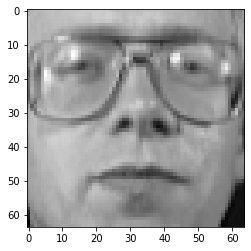

In [7]:
plt.imshow(X[11].reshape(64,64), cmap="gray")

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(200, 4096)
(200, 4096)
(200,)
(200,)


In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train) 

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
np.mean(log_reg.predict(X_test) == Y_test)

0.85

In [11]:
pca = PCA(n_components=50)   # 4096 -> 140
pca.fit(X_train)

print(X_train.shape)

lowX = pca.transform(X_train)
print(lowX.shape)

(200, 4096)
(200, 50)


In [12]:
recon = pca.inverse_transform(lowX)

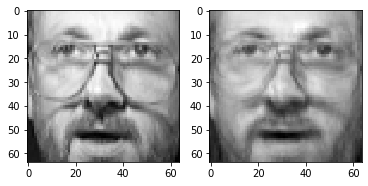

In [13]:
plt.subplot(121)
plt.imshow( X_train[123].reshape(64,64), cmap='gray')
plt.subplot(122)
plt.imshow( recon[123].reshape(64,64), cmap='gray')

In [14]:
log_reg.fit(lowX, Y_train)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#pca = PCA(n_components=50)   # 4096 ->  50
#pca.fit(X_test)
lowX_test = pca.transform(X_test)
np.mean(log_reg.predict(lowX_test) == Y_test)

0.87

In [16]:
print(pca.singular_values_)

[59.024017  44.922874  35.695324  28.153309  24.259993  22.202208
 19.727142  19.074476  17.871988  17.10639   16.373735  15.73426
 14.276242  13.50224   13.111989  12.208339  12.010828  11.515233
 11.178227  10.697014  10.337859  10.130047   9.932373   9.731539
  9.515727   9.494914   9.045982   8.624051   8.59956    8.34489
  8.110025   7.836792   7.714599   7.4760394  7.3873324  7.2845144
  7.1880436  7.104456   6.985718   6.782775   6.6929245  6.6066294
  6.3910203  6.2802753  6.2174087  6.128411   6.0640736  5.926992
  5.9019794  5.7993026]


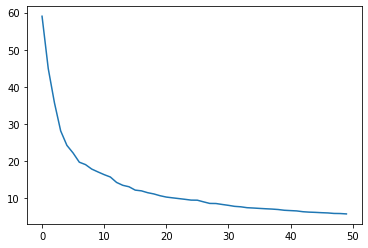

In [17]:
plt.plot(pca.singular_values_)

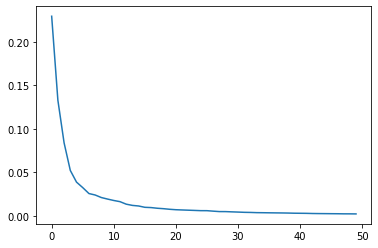

In [18]:
plt.plot(pca.explained_variance_ratio_)

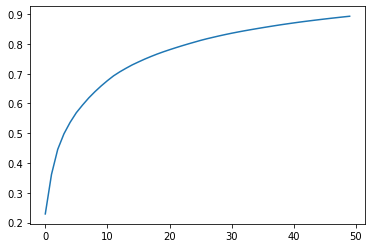

In [19]:
cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs)

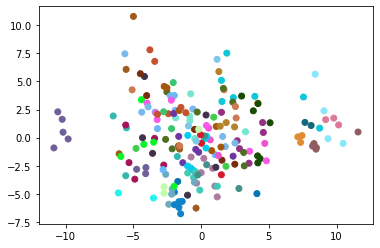

In [20]:
col =  np.random.rand(40,3)
colors = [col[i]  for i in Y_train ]
plt.scatter(lowX[:,0], lowX[:,1], c=colors)

(200, 2)
(200, 1)


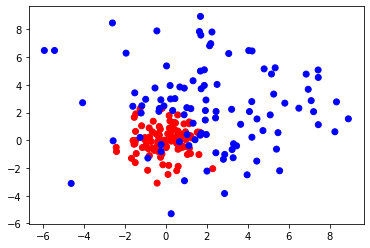

In [21]:
samples = 100

x_data0 = np.random.normal(0, 1, size=[samples,2])  # r == 0 
x_data1 = np.random.normal(2, 3, size=[samples,2])  # b == 1
x_data = np.vstack([x_data0, x_data1])
print(x_data.shape)

y_data = np.vstack([np.zeros(samples).reshape(samples,1) , np.ones(samples).reshape(samples,1) ]) 
print(y_data.shape)

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]

plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [22]:
model = KMeans(n_clusters=2, init="random", max_iter=6).fit(x_data)
print(model.cluster_centers_)

[[0.13373874 0.18744301]
 [3.70108183 3.93716868]]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0
 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1]


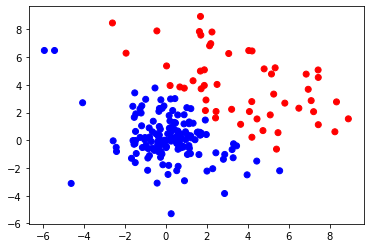

In [23]:
d = ['blue', 'red']
print(model.labels_)
colors = [  d[i] for i in model.labels_]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [24]:
model = KMeans(n_clusters=40, init="random", max_iter=6).fit(X)

print(model.labels_)
print(y)

[ 9 24 19 30 24 30  6 30  6 24 11 11 11 11 11 11 11 11 11 11  0  3  3  4
  4  4 23 23 19 19 15  3 15 12 12 30 10 17 11  3 15  3  3 15 23 23 17 23
 23  6 12 12 12 36 36 36 36 36 36 36  9  9  6  6  6  6  9  9  6  6  9  9
  9 24  9  9 24  9 30 24 37 37 37 37 37 17 17 37 37 37 19 19 24 24 19 19
 19 19 23  9 39 39 39  8 39 39  8  8  8 39 28 34 34 34 34 30 34 28 28 28
 10  3 17 17 10  3 20 17 10 10 35 35 35 35 35 35 35 35 35 35 18 10 18 18
 10 18 10 18 10 15 31 10 10  9  9 31 24 30 18 10 16 16  0  0 16 23 23 16
 23 23 12 12 17 12 12 12 12 12 12 30 38 38 38  9  9 38  9  9  9 38 33 33
 33 15 10 15 10 10 10 33 33  5  5 15 15 15 20 20 15 20 13 13 13 22 13 22
 13 13 13 13 12 12 37 17 37 17 37 12 30 30 18 18 20 20 18 18 18 18 20 20
  3  3  3  3 17  3  3 17  3  3  0  0  0  0  0  0 12  0  0  3 29 14 29 29
 29 14 14 29 14 29 27  7 27 27  7 27  7 27  7 27  5  5  5  4 20 20  4 20
  5  5 15 33  3 33 33 15 33 33 15 15  4 33 33 33 33  4 33  4  4 33 21 21
 21 21 21 21  3 21 21 21  2  2  2  2  2  2  2  2  2

In [25]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [26]:
pca = PCA(n_components=1)  
pca.fit(X)
pca.explained_variance_ratio_

array([0.92461872])

In [27]:
low = pca.transform(X)

In [28]:
model = KMeans(n_clusters=6, init="random", max_iter=6).fit(low)

In [29]:
model.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 0, 2, 5, 2, 0, 2, 5, 0, 5, 5, 0, 5, 0, 5, 0,
       0, 5, 0, 5, 2, 5, 2, 0, 0, 0, 2, 2, 0, 5, 5, 5, 5, 2, 0, 0, 2, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 3, 2, 3, 3, 3, 1, 0, 1, 3, 1,
       2, 3, 3, 2, 2, 3, 3, 1, 1, 2, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 1, 1,
       3, 2, 3, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2])

In [37]:
col =  ['red', 'blue', 'black', 'yellow', 'cyan', 'green']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [38]:
col =  ['red', 'blue', 'black']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='*')

col =  ['red', 'black', 'blue']
colors = [col[i]  for i in y ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='^')


IndexError: list index out of range

In [39]:
print(low.shape)
reconX = pca.inverse_transform(low)
print(reconX.shape)

print(X[0:10])
print(reconX[0:10])

(150, 1)
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[4.87332632 3.28420238 1.45858847 0.23764012]
 [4.86247892 3.28673941 1.4328746  0.22688569]
 [4.79929088 3.30151808 1.2830867  0.16423922]
 [4.85120324 3.28937661 1.40614547 0.21570665]
 [4.85721176 3.28797132 1.42038875 0.22166368]
 [5.01906124 3.25011732 1.8040546  0.38212597]
 [4.82402881 3.29573228 1.34172822 0.18876513]
 [4.89427975 3.27930171 1.50825879 0.25841396]
 [4.80023332 3.30129766 1.28532076 0.16517358]
 [4.87743522 3.28324137 1.46832867 0.2417138 ]]


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

tree = DecisionTreeClassifier(max_depth=7)

iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
tree.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names,  class_names=iris.target_names, rounded=True, filled=True, impurity=True)


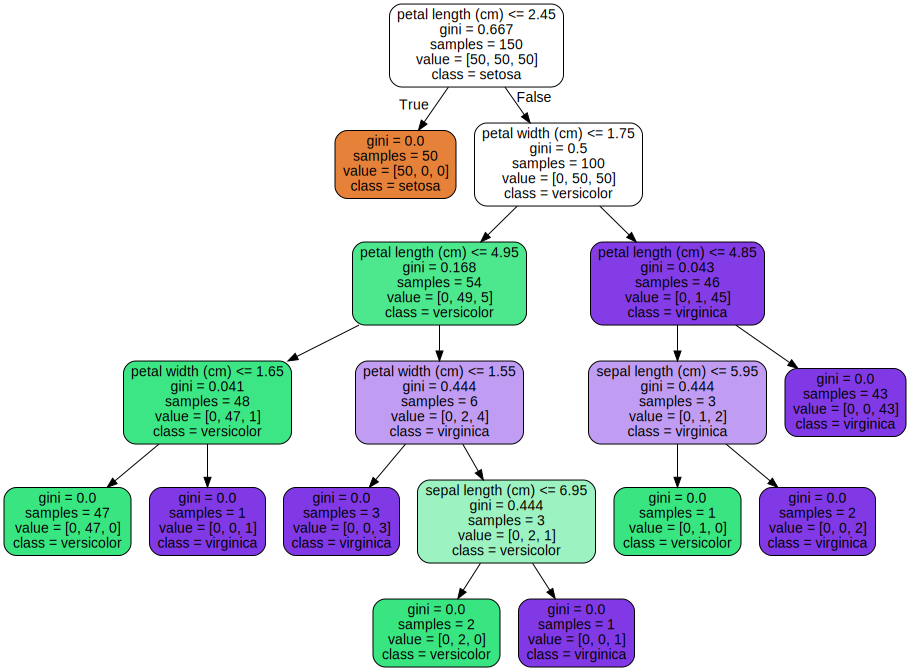

In [43]:
import pydot
graph = pydot.graph_from_dot_file("iris.dot")[0]
import graphviz
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))



In [44]:
# lowX
X = faces_all.data
y = faces_all.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)

In [45]:
pca = PCA(n_components=100)   
pca.fit(X_train)

lowX = pca.transform(X_train)
lowX_test = pca.transform(X_test)

tree = DecisionTreeClassifier(max_depth=20)
tree.fit(lowX, Y_train)
print(np.mean(tree.predict(lowX) == Y_train))
print(np.mean(tree.predict(lowX_test) == Y_test))

0.9
0.34


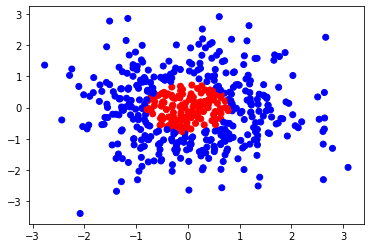

In [46]:
samples = 500
x_data = np.random.normal(0, 1, size=[samples,2])
d = np.sqrt([x[0]**2+x[1]**2  for x in x_data ])
y_data = np.array([0  if   i < 0.8   else   1 for i  in d   ]).reshape(samples, 1)
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [47]:
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
log_reg.score(x_data, y_data)  #  np.mean(log_reg.predict(x_data) == y_data)


0.714

In [49]:
log_reg.predict(x_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

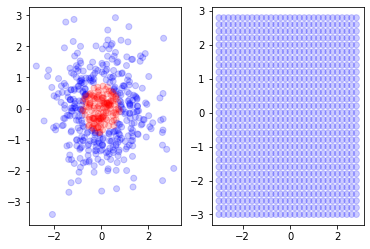

In [50]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)


xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = log_reg.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

In [51]:
from sklearn.svm import SVC     
model = SVC(kernel='poly', degree=2).fit(x_data, y_data) 

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


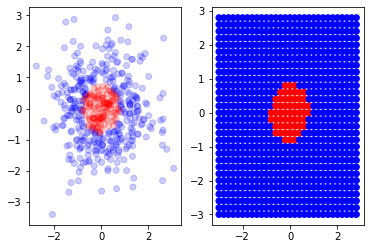

In [52]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=1)

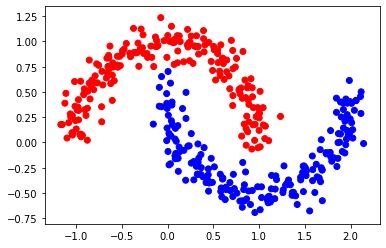

In [53]:
from sklearn.datasets import make_moons
x_data, y_data= make_moons(n_samples=400, noise=0.1, random_state=0)

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)


In [54]:
model = SVC(kernel='rbf').fit(x_data, y_data) 

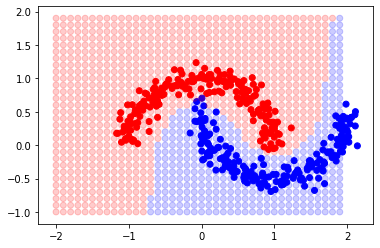

In [55]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

poly.fit([[2, 6]])
print(poly.transform([[1,2]]))   #   1,  1, 2 , 1^2, 1*2, 2^2

[[1. 1. 2. 1. 2. 4.]]


In [57]:
poly.fit(x_data)
X2 = poly.transform(x_data)
log_reg = LogisticRegression()
log_reg.fit(X2, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

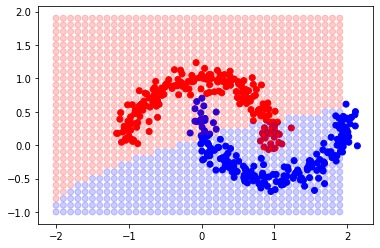

In [58]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
grid = poly.transform(grid)
p = log_reg.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

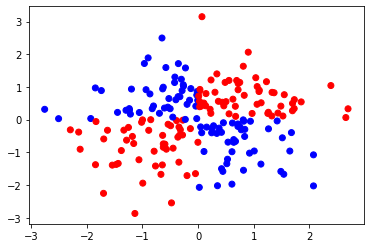

In [59]:
x_data = np.random.randn(200, 2)
y_data  = np.logical_xor(x_data[:, 0] > 0, x_data[:, 1] > 0)*2-1


colors = ["red"  if   i  == -1  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)
# PolynomialFeatures: 강제로 새로운 피처를 만들어낸다

poly.fit([[2,6]])
print(poly.transform([[2,6]]))    # 1, 1, 2, 1^2, 1*2, 2^2

[[ 1.  2.  6.  4. 12. 36.]]


In [61]:
poly.fit(x_data)
print(x_data.shape)

(200, 2)


In [62]:
X2=poly.transform(x_data)
print(X2.shape)

(200, 6)


In [63]:
log_reg=LogisticRegression()
# predict 하면 0의 값이 나온다? 안나온다? 
# linear로도 됨 단, 값의 범위가 달라질뿐 마이너스(음)도 나옴
log_reg.fit(X2, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

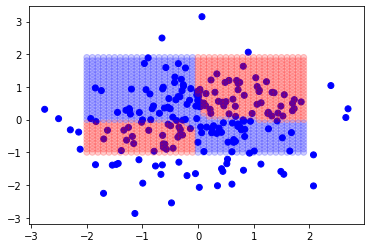

In [64]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
grid = poly.transform(grid)
p = log_reg.predict(grid) >0.5

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

In [66]:
x= [1,2]
X2= [1, x[0], x[1], x[0]**2, x[0]*x[1], x[1]**2]


In [70]:
import numpy.linalg as lin
W=np.matmul(lin.pinv(X2), y_data)
predict= np.matmyl(X2, W)>0.5

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional